<a href="https://colab.research.google.com/github/phinhannguyen04/Fake-Voice-Detection/blob/main/FakeVoice_CNN_with_Data1D.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

### **SET UP KAGGLE**

In [ ]:
! pip install kaggle

In [ ]:
! mkdir ~/.kaggle

In [ ]:
! cp kaggle.json ~/.kaggle/

In [ ]:
! chmod 600 ~/.kaggle/kaggle.json

### **TẢI DATASET TỪ KAGGLE**

### **Tải các file fake audio**

In [ ]:
# ! kaggle datasets download andreadiubaldo/wavefake-test

In [ ]:
# ! unzip wavefake-test.zip

### **Đường dẫn đến folder fake các giọng bằng tiếng Anh**

In [ ]:
# fake = '/content/generated_audio/ljspeech_parallel_wavegan/'

In [ ]:
# # Thêm các thư viện
# import librosa
# import IPython.display as ipd

# y, sr = librosa.load(fake + 'LJ001-0001_gen.wav')
# ipd.Audio(y, rate=sr)


### **Tải file real audio**

In [ ]:
# ! kaggle datasets download mathurinache/the-lj-speech-dataset

In [ ]:
# ! unzip the-lj-speech-dataset.zip

In [ ]:
# real = '/content/LJSpeech-1.1/wavs/'

In [ ]:
# x, sr = librosa.load(real + 'LJ001-0001.wav')
# ipd.Audio(x, rate=sr)

Link dataset: https://www.kaggle.com/datasets/mohammedabdeldayem/the-fake-or-real-dataset

In [ ]:
# ! kaggle datasets download mohammedabdeldayem/the-fake-or-real-dataset

In [ ]:
# ! unzip the-fake-or-real-dataset.zip

## **CHUẨN BỊ DỮ LIỆU**

link: https://www.kaggle.com/datasets/utsavavaiya/release-audio-500

### **Tải dataset từ Kaggle**

In [ ]:
! kaggle datasets download utsavavaiya/release-audio-500

Dataset URL: https://www.kaggle.com/datasets/utsavavaiya/release-audio-500
License(s): unknown


### **Giải nén file vừa tải về**

In [ ]:
! unzip release-audio-500.zip

Archive:  release-audio-500.zip
  inflating: test_audio_500/fake/0.wav  
  inflating: test_audio_500/fake/1.wav  
  inflating: test_audio_500/fake/1008.wav  
  inflating: test_audio_500/fake/1015.wav  
  inflating: test_audio_500/fake/1030.wav  
  inflating: test_audio_500/fake/1051.wav  
  inflating: test_audio_500/fake/107.wav  
  inflating: test_audio_500/fake/1073.wav  
  inflating: test_audio_500/fake/1078.wav  
  inflating: test_audio_500/fake/1082.wav  
  inflating: test_audio_500/fake/1087.wav  
  inflating: test_audio_500/fake/1097.wav  
  inflating: test_audio_500/fake/1121.wav  
  inflating: test_audio_500/fake/1123.wav  
  inflating: test_audio_500/fake/1128.wav  
  inflating: test_audio_500/fake/1132.wav  
  inflating: test_audio_500/fake/1136.wav  
  inflating: test_audio_500/fake/1150.wav  
  inflating: test_audio_500/fake/1169.wav  
  inflating: test_audio_500/fake/117.wav  
  inflating: test_audio_500/fake/1170.wav  
  inflating: test_audio_500/fake/1203.wav  
  inflat

### **Xóa file zip sau khi giải nén**

In [ ]:
import os
os.remove("/content/release-audio-500.zip")

### **Đường dẫn chung**

In [ ]:
PATH = '/content/test_audio_500/'

In [ ]:
REAL_PATH = PATH + 'real/'
FAKE_PATH = PATH + 'fake/'

### **Kiểm tra độ dài của mỗi folder**

In [ ]:
print(len(os.listdir(REAL_PATH)))
print(len(os.listdir(FAKE_PATH)))

500
500


### Kiểm tra các tệp âm thanh

In [ ]:
import librosa
import IPython.display as ipd

# file real
f1, sr = librosa.load(REAL_PATH + '/1002.wav')
ipd.Audio(f1, rate=sr)

In [ ]:
# Tính thời gian của f1
f1_time = librosa.times_like(f1, sr=sr)
print(f1_time)

[0.00000000e+00 2.32199546e-02 4.64399093e-02 ... 2.80622440e+03
 2.80624762e+03 2.80627084e+03]


In [ ]:
# file fake
f2, sr = librosa.load(FAKE_PATH + '/1008.wav')
ipd.Audio(f2, rate=sr)

In [ ]:
# Tính thời gian của f2
f2_time = librosa.times_like(f2, sr=sr)
print(f2_time)

[0.00000000e+00 2.32199546e-02 4.64399093e-02 ... 1.07364426e+03
 1.07366748e+03 1.07369070e+03]


## **XỬ LÝ DỮ LIỆU**

### **Biểu đồ tần số của hai loại âm thanh**

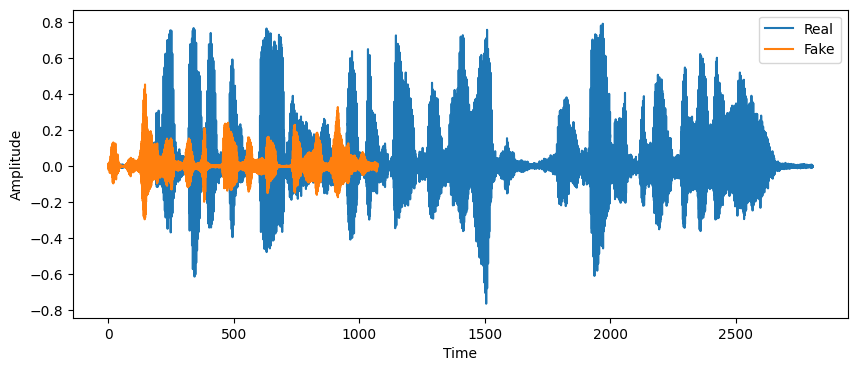

In [ ]:
import matplotlib.pyplot as plt

plt.figure(figsize=(10, 4))
plt.plot(f1_time, f1)
plt.plot(f2_time, f2)
plt.legend(['Real', 'Fake'])
plt.xlabel('Time')
plt.ylabel('Amplitude')
plt.show()

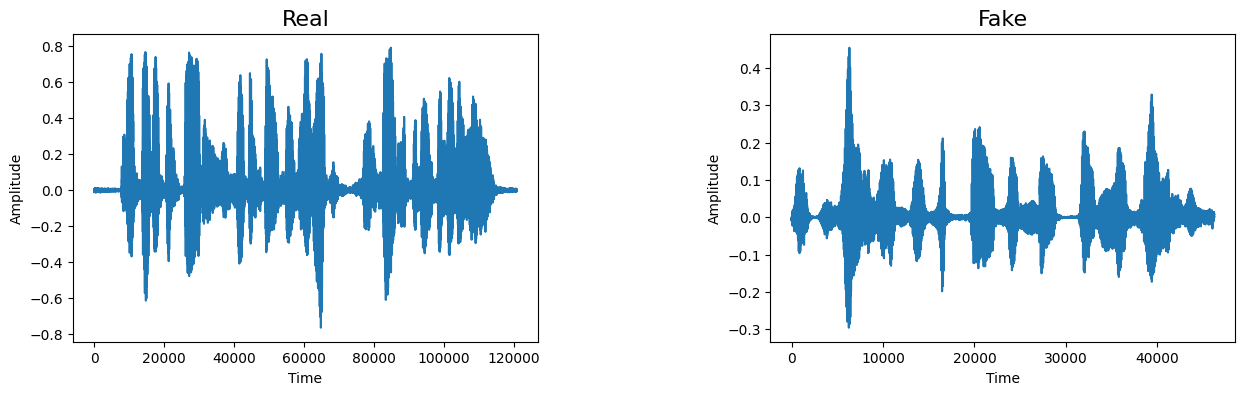

In [ ]:
plt.figure(figsize=(15, 4))

# real
plt.subplot(1, 2, 1)
plt.plot(f1)
plt.xlabel('Time')
plt.ylabel('Amplitude')
plt.title("Real", fontsize=16)

# fake
plt.subplot(1, 2, 2)
plt.plot(f2)
plt.xlabel('Time')
plt.ylabel('Amplitude')
plt.title("Fake", fontsize=16)

# tăng khoảng cách
plt.subplots_adjust(wspace=0.5)
plt.show()

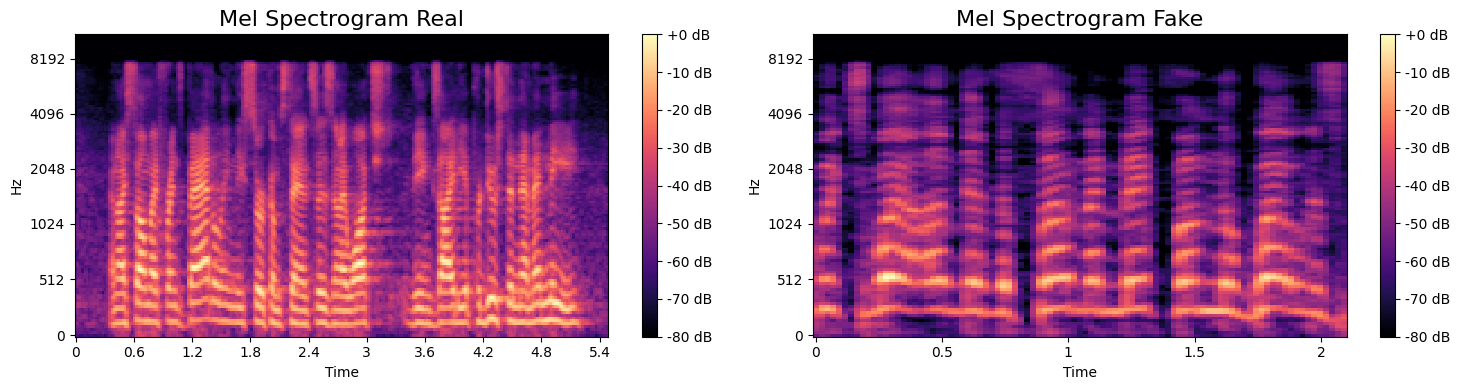

In [ ]:
import numpy as np

# Biểu diễn mel spectrogram
mel_spectrogram_f1 = librosa.feature.melspectrogram(y=f1, sr=sr)
mel_spectrogram_db_f1 = librosa.power_to_db(mel_spectrogram_f1, ref=np.max)

mel_spectrogram_f2 = librosa.feature.melspectrogram(y=f2, sr=sr)
mel_spectrogram_db_f2 = librosa.power_to_db(mel_spectrogram_f2, ref=np.max)

# Vẽ biểu đồ
plt.figure(figsize=(15, 4))

plt.subplot(1, 2, 1)
librosa.display.specshow(mel_spectrogram_db_f1, sr=sr, x_axis='time', y_axis='mel')
plt.colorbar(format='%+2.0f dB')
plt.title('Mel Spectrogram Real', fontsize=16)

plt.subplot(1, 2, 2)
librosa.display.specshow(mel_spectrogram_db_f2, sr=sr, x_axis='time', y_axis='mel')
plt.colorbar(format='%+2.0f dB')
plt.title('Mel Spectrogram Fake', fontsize=16)

plt.tight_layout()
plt.show()

### **Hàm chuyển đổi từ tần số sang MFCC**

In [ ]:
RATE = 16000

Số lượng 13 cho tham số n_mfcc trong việc trích xuất MFCC (Mel-frequency Cepstral Coefficients) thường được chọn vì lý do sau:

**1. Dựa trên đặc điểm của thính giác con người:**
- MFCC được thiết kế để mô phỏng cách tai người cảm nhận âm thanh. Tai người có độ nhạy tốt nhất trong các tần số thấp và giảm dần ở tần số cao hơn.

- 13 hệ số đầu tiên thường là đủ để đại diện cho thông tin quan trọng nhất của tín hiệu âm thanh, bao gồm cả đặc điểm phổ và tần số quan trọng.

**2. Tính cân đối giữa thông tin và kích thước:**
- Khi chọn n_mfcc = 13, bạn có được thông tin tóm gọn nhưng vẫn giữ được đặc trưng quan trọng của âm thanh.

- Quá ít hệ số sẽ làm mất thông tin đặc trưng, trong khi quá nhiều hệ số sẽ dẫn đến dư thừa, làm tăng kích thước dữ liệu và yêu cầu tính toán.

**3. Tiêu chuẩn trong xử lý âm thanh:**
- Trong các bài toán như nhận dạng giọng nói (speech recognition), n_mfcc = 13 là tiêu chuẩn phổ biến nhờ hiệu quả của nó.

- Các hệ số cao hơn 13 thường biểu diễn nhiễu hoặc thông tin không quan trọng trong âm thanh.

**4. Tương thích với thuật toán học máy:**
- Với n_mfcc = 13, dữ liệu trích xuất đủ nhỏ để xử lý dễ dàng, đồng thời vẫn chứa đựng đặc trưng quan trọng để phân loại hoặc nhận diện.

Nguồn tham khảo:

https://iq.opengenus.org/mfcc-audio/

In [ ]:
#-----------------------------------------------------------------
# Hàm chuyển đổi tần một tệp âm thanh sang MFCC trả về
#   :param wav (numpy array): Wav form
#   :return (2d numpy array: MFCC
#-----------------------------------------------------------------
def to_mfcc (audio, RATE=RATE, N_MFCC=13):
  # y, sr = librosa.load(audio)
  spectro_gram = librosa.feature.mfcc(y=audio, sr=RATE, n_mfcc=N_MFCC)
  return spectro_gram




### **Hàm load âm thanh**

In [ ]:
#-----------------------------------------------------------------
# Hàm lấy âm thanh từ đường dẫn
#    :param language_num (list): list of file names
#    :return (numpy array): Down-sampled wav file
#-----------------------------------------------------------------
def get_wav(audio_path, RATE=RATE):
    y, sr = librosa.load(audio_path)
    return(librosa.core.resample(y=y,orig_sr=sr,target_sr=RATE, scale=True))

## **Chuẩn hóa độ dài âm thanh bằng librosa.util.fix_length**

Nguồn tham khảo: https://stackoverflow.com/questions/52841335/how-can-i-pad-wav-file-to-specific-length

- Nếu độ dài của file âm thanh ngắn hơn độ dài mục tiêu, librosa.util.fix_length() sẽ thêm các mẫu 0 vào cuối file âm thanh (padding).
- Nếu độ dài của file âm thanh dài hơn độ dài mục tiêu, librosa.util.fix_length() sẽ cắt bớt các mẫu thừa ở cuối file âm thanh (truncating).
- Bạn có thể thay đổi target_duration để điều chỉnh độ dài mục tiêu theo nhu cầu của bạn.
- Bạn cũng có thể sử dụng các tham số khác của librosa.util.fix_length() để điều chỉnh hành vi của hàm, ví dụ như axis và mode (để thay đổi phương pháp padding).

16 kHz: Được sử dụng phổ biến trong các ứng dụng nhận dạng giọng nói và các ứng dụng có băng thông hạn chế.
Nguồn thông tin: https://en.wikipedia.org/wiki/Hearing_range

### **Giải thuật cắt ngắn âm thanh**


In [ ]:
#------------------------------------------------------------------------------
# Hàm chuẩn hóa kích thước của âm thanh
#     : audio_path: đường dẫn của file âm thanh
#     : target_duration: thời lượng cần lấy
#     : standar_sr: tần số tiêu chuẩn
#------------------------------------------------------------------------------
def fix_length (audio_paths, target_duration=2, standard_sr = 16000):

  # Tính toán số lượng mẫu tương ứng với độ dài mục tiêu
  target_samples = target_duration * standard_sr

  # Chuẩn hóa độ dài cho tất cả các file âm thanh
  fixed_audios = []
  for audio_path in audio_paths:
      audio, _ = librosa.load(audio_path, sr=sr)  # Đọc file âm thanh với sample rate đã lấy
      fixed_audio = librosa.util.fix_length(audio, size=target_samples)
      fixed_audios.append(fixed_audio)

  return fixed_audios


### **Hàm chuyển đổi sang Mel-spectrogram (đáp ứng yêu cầu bài toán)**

Lý do:

**Mel-spectrogram:**

Ưu điểm:

- Biểu diễn trực quan: Mel-spectrogram giữ lại cấu trúc thời gian - tần số của tín hiệu, giúp dễ dàng hiểu và phân tích khi được vẽ dưới dạng đồ thị.

- Thông tin đầy đủ hơn: Vì không áp dụng phép biến đổi DCT, Mel-spectrogram lưu giữ các thông tin tần số nguyên bản hơn, rất hữu ích cho các mô hình học sâu như CNN (Convolutional Neural Networks).

- Hiệu quả với mô hình mạnh: Khi sử dụng các bộ phân loại mạnh (như CNN hoặc Transformer) và dữ liệu lớn, Mel-spectrogram thường mang lại hiệu suất cao hơn.

Nhược điểm:

- Kích thước lớn: Dữ liệu Mel-spectrogram có kích thước lớn hơn MFCC, làm tăng yêu cầu tính toán.

- Không "giải tương quan": Các dải tần Mel-spectrogram không được giải tương quan, có thể không phù hợp với các mô hình tuyến tính.

**Nguồn tham khảo tại mlarchive.com**
https://mlarchive.com/machine-learning/the-ultimate-guide-for-sound-features-and-their-applications/





**Nguồn tham khảo**:

---
https://tiensu.github.io/blog/68_audio_deep_learning_part_2/


**Nguồn tham khảo tại** https://medium.com/analytics-vidhya/understanding-the-mel-spectrogram-fca2afa2ce53

Giải thích:

- librosa.feature.melspectrogram(y=audio, sr=sr): Tính toán phổ Mel từ tín hiệu âm thanh audio với tần số lấy mẫu sr. Kết quả là phổ Mel tuyến tính (power spectrogram).

- librosa.power_to_db(mel_spectrogram, ref=np.max): Chuyển đổi phổ Mel tuyến tính sang thang decibel (dB) bằng cách sử dụng np.max làm giá trị tham chiếu. Điều này có nghĩa là giá trị lớn nhất trong phổ Mel sẽ được đặt là 0 dB, và các giá trị khác sẽ được tính toán tương đối so với giá trị này



> (sử dụng power_to_db và np.max): Thường được sử dụng phổ biến hơn trong các ứng dụng học sâu vì nó giúp chuẩn hóa dữ liệu tốt hơn.

In [ ]:
import numpy as np

def to_mel_spectrogram(audio, RATE=RATE, N_FFT=2048, hop_length=512):
    mel_spectrogram = librosa.feature.melspectrogram(y=audio, sr=sr)
    mel_spectrogram_db = librosa.power_to_db(mel_spectrogram, ref=np.max)
    return mel_spectrogram_db

#### Thay đổi kích thước phổ mel spectrogram cho giống phổ trong mô hình

In [ ]:
def resize_mel_spectrogram(mel_spectrogram, target_shape=(128, 63)):
    return librosa.util.fix_length(mel_spectrogram, size=target_shape[1], axis=1)[:, :target_shape[1]]

#### Tăng cường dữ liệu

In [ ]:
def normalize_mel_spectrogram(mel_spectrogram):
    return (mel_spectrogram - np.mean(mel_spectrogram)) / np.std(mel_spectrogram)

#### Reshape phổ Mel

In [ ]:
def reshape_mel_spectrogram(mel_spectrogram):
    return mel_spectrogram[:, :, np.newaxis]

In [ ]:
sample = get_wav(REAL_PATH + '1002.wav')

In [ ]:
mel_spec = to_mel_spectrogram(sample)

### Hàm biểu diễn mel_spectrogram

### **Hàm tính Mel spectrogram tổng quát**

In [ ]:
def preprocess(audio_data, sr = 16000):
  # audio, sr = librosa.load(file_path)
  mel_spectrogram = to_mel_spectrogram(audio_data, sr)
  mel_spectrogram = resize_mel_spectrogram(mel_spectrogram)
  mel_spectrogram = normalize_mel_spectrogram(mel_spectrogram)
  mel_spectrogram = reshape_mel_spectrogram(mel_spectrogram)
  return mel_spectrogram

## **CHUẨN HÓA DỮ LIỆU**

## Tạo lần lượt 2 mảng REAL_FILE và FAKE_FILE để lưu đường dẫn các tập tin có trong thư mục real và fake.

Lấy từ file đầu tiên đến file thứ n - 1 của mỗi folder, file cuối cùng sẽ dùng để đánh giá kết quả train mô hình.

In [ ]:
REAL_FILES = []
FAKE_FILES = []

In [ ]:
print(os.path.join(REAL_PATH, os.listdir(REAL_PATH)[0]))
print(os.path.join(FAKE_PATH, os.listdir(FAKE_PATH)[0]))

/content/test_audio_500/real/1395.wav
/content/test_audio_500/fake/1459.wav


In [ ]:
for file in range(len(os.listdir(REAL_PATH))):
  REAL_FILES.append(os.path.join(REAL_PATH, os.listdir(REAL_PATH)[file]))


for file in range(len(os.listdir(FAKE_PATH))):
  FAKE_FILES.append(os.path.join(FAKE_PATH, os.listdir(FAKE_PATH)[file]))

print(len(REAL_FILES))
print(len(FAKE_FILES))

500
500


### Lấy ra file còn lại ở mỗi thư mục

In [ ]:
real_file_test = REAL_FILES[-1]
fake_file_test = FAKE_FILES[-1]

In [ ]:
print(real_file_test)
print(fake_file_test)

/content/test_audio_500/real/6878.wav
/content/test_audio_500/fake/3227.wav


In [ ]:
y_real, sr = librosa.load(real_file_test)
ipd.Audio(y_real, rate=sr)

In [ ]:
y_fake, sr = librosa.load(fake_file_test)
ipd.Audio(y_fake, rate=sr)

### **Gộp cả hai dataset lại**


## Kết hợp 2 thư mục

In [ ]:
dataset = REAL_FILES[:-1] + FAKE_FILES[:-1]

In [ ]:
print(len(dataset))
print(('real' in dataset[0]))

998
True


Nguồn tham khảo: https://www.kaggle.com/code/nilshmeier/melspectrogram-based-cnn-classification#Data-Exploration

In [ ]:
feature_list = []
label_list = []

In [ ]:
# Áp dụng hàm fix length
fixed_audios = fix_length(dataset)

## Chuẩn hóa các file âm thanh về cùng một kích thước

In [ ]:
for i, audio_data in enumerate(fixed_audios):
  # mel_spec = preprocess(audio_data)
  # feature_list.append(audio_data.reshape((128, 63, 1)))
  if 'real' in dataset[i]:
    label_list.append(1)
  else:
    label_list.append(0)

# features = np.array(feature_list)
features = np.array(fixed_audios)
labels = np.array(label_list)

In [ ]:
print(features.shape)
print(labels.shape)

(998, 32000)
(998,)


In [ ]:
print(labels[-1])
print(labels[1])

0
1


### **Chia tập dữ liệu**

Nguồn tham khảo: https://towardsdatascience.com/cnns-for-audio-classification-6244954665ab/

# Train model


### Mạng nơ-ron 1D (1D CNN): Mạng nơ-ron tích chập 1D có thể học được các mẫu phức tạp trong dữ liệu âm thanh 1D.

In [ ]:
import numpy as np
import tensorflow as tf
from tensorflow import keras
from keras import models, layers
from sklearn.model_selection import train_test_split

from sklearn.metrics import roc_auc_score, matthews_corrcoef, f1_score
import time


# features là mảng numpy có kích thước (số lượng mẫu, độ dài tín hiệu)
# labels là mảng numpy có kích thước (số lượng mẫu,)

# Chia dữ liệu thành tập huấn luyện và tập kiểm tra
X_train, X_test, y_train, y_test = train_test_split(features, labels, test_size=0.2)

# Định hình lại dữ liệu đầu vào cho 1D CNN
X_train = np.expand_dims(X_train, axis=2)
X_test = np.expand_dims(X_test, axis=2)

# Xây dựng mô hình 1D CNN
model = tf.keras.Sequential([
    keras.layers.Conv1D(16, 3, activation='relu', input_shape=(X_train.shape[1], 1)),
    keras.layers.MaxPooling1D(2),

    # keras.layers.Conv1D(32, 3, activation='relu'),
    # keras.layers.MaxPooling1D(2),

    keras.layers.Flatten(),
    keras.layers.Dropout(0.2),
    keras.layers.Dense(128, activation='relu'),
    keras.layers.Dense(1, activation='sigmoid')
])

# Biên dịch mô hình
model.compile(optimizer='adam', loss='binary_crossentropy', metrics=['accuracy'])

early_stopping = keras.callbacks.EarlyStopping(monitor='val_loss', patience=10, restore_best_weights=True)

aucs = []
mccs = []
f1s = []

# Thời gian bắt đầu
start_time = time.time()
# Huấn luyện mô hình
history = model.fit(X_train, y_train, epochs=10, validation_data=(X_test, y_test), callbacks=[early_stopping])
# Thời gian kết thúc
end_time = time.time()

Epoch 1/10
25/25 ━━━━━━━━━━━━━━━━━━━━ 30s 1s/step - accuracy: 0.5459 - loss: 0.7102 - val_accuracy: 0.6300 - val_loss: 0.6749
Epoch 2/10
25/25 ━━━━━━━━━━━━━━━━━━━━ 40s 1s/step - accuracy: 0.8229 - loss: 0.4779 - val_accuracy: 0.6800 - val_loss: 0.6927
Epoch 3/10
25/25 ━━━━━━━━━━━━━━━━━━━━ 42s 1s/step - accuracy: 0.9376 - loss: 0.2561 - val_accuracy: 0.6450 - val_loss: 0.8180
Epoch 4/10
25/25 ━━━━━━━━━━━━━━━━━━━━ 41s 1s/step - accuracy: 0.9725 - loss: 0.1210 - val_accuracy: 0.6150 - val_loss: 0.9963
Epoch 5/10
25/25 ━━━━━━━━━━━━━━━━━━━━ 41s 1s/step - accuracy: 0.9931 - loss: 0.0456 - val_accuracy: 0.6450 - val_loss: 1.1687
Epoch 6/10
25/25 ━━━━━━━━━━━━━━━━━━━━ 42s 1s/step - accuracy: 0.9981 - loss: 0.0179 - val_accuracy: 0.6500 - val_loss: 1.2545
Epoch 7/10
25/25 ━━━━━━━━━━━━━━━━━━━━ 40s 1s/step - accuracy: 0.9983 - loss: 0.0097 - val_accuracy: 0.6400 - val_loss: 1.3598
Epoch 8/10
25/25 ━━━━━━━━━━━━━━━━━━━━ 29s 1s/step - accuracy: 0.9985 - loss: 0.0086 - val_accuracy: 0.6250 - val_loss:

In [ ]:
training_time = end_time - start_time

# Dự đoán trên tập kiểm tra
y_pred_proba = model.predict(X_test)
y_pred = (y_pred_proba > 0.5).astype(int)

# Tính các độ đo
auc = roc_auc_score(y_test, y_pred_proba)
mcc = matthews_corrcoef(y_test, y_pred)
f1 = f1_score(y_test, y_pred)
acc = model.evaluate(X_test, y_test)[1]

# In kết quả

print(f"Accuracy: {acc:.4f}")
print(f"AUC: {auc:.4f}")
print(f"MCC: {mcc:.4f}")
print(f"F1-score: {f1:.4f}")
print(f"Thời gian huấn luyện: {training_time:.2f} giây")

7/7 ━━━━━━━━━━━━━━━━━━━━ 1s 156ms/step
7/7 ━━━━━━━━━━━━━━━━━━━━ 1s 141ms/step - accuracy: 0.6257 - loss: 0.6614
Accuracy: 0.6300
AUC: 0.6554
MCC: 0.2595
F1-score: 0.6186
Thời gian huấn luyện: 385.58 giây


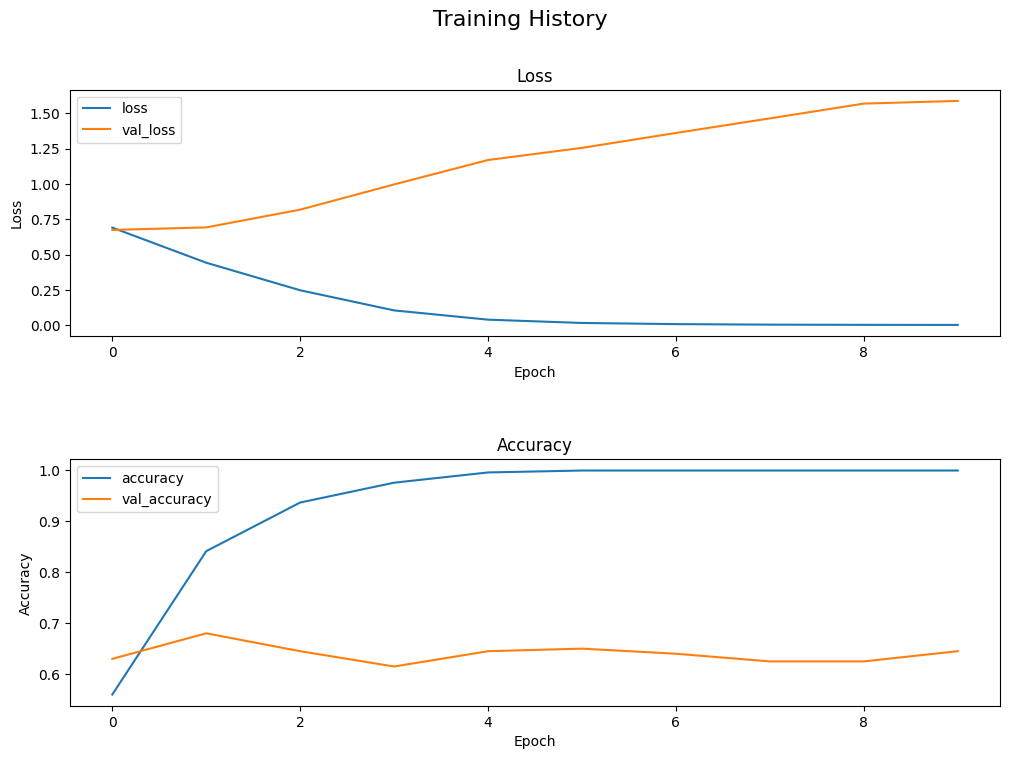

In [ ]:

fig, axs = plt.subplots(2, 1, figsize=(12, 8))

fig.suptitle('Training History', fontsize=16)

axs[0].plot(history.epoch, history.history['loss'], history.history['val_loss'])
axs[0].set(title='Loss', xlabel='Epoch', ylabel='Loss')
axs[0].legend(['loss', 'val_loss'])

axs[1].plot(history.epoch, history.history['accuracy'], history.history['val_accuracy'])
axs[1].set(title='Accuracy', xlabel='Epoch', ylabel='Accuracy')
axs[1].legend(['accuracy', 'val_accuracy'])

plt.subplots_adjust(hspace=0.5)

plt.show()

In [ ]:
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.metrics import confusion_matrix


# ... (Phần code huấn luyện mô hình của bạn)

# Dự đoán nhãn trên tập kiểm tra
y_pred = model.predict(X_test)
y_pred_classes = (y_pred > 0.5).astype("int32")  # Chuyển đổi xác suất thành nhãn 0 hoặc 1

# Lấy nhãn thực tế từ tập kiểm tra
y_true = y_test

7/7 ━━━━━━━━━━━━━━━━━━━━ 1s 146ms/step


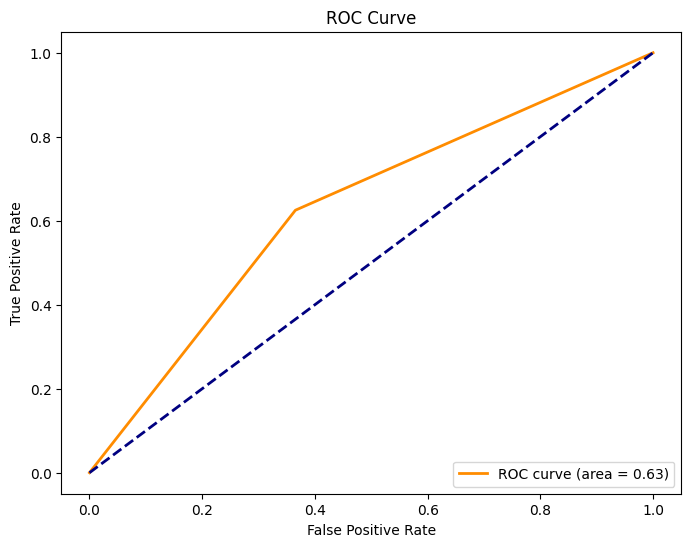

In [ ]:

from sklearn.metrics import roc_curve, auc


# Tính toán ROC curve và AUC
fpr, tpr, thresholds = roc_curve(y_true, y_pred_classes) # Sử dụng y_pred_classes nếu y_pred là xác suất
roc_auc = auc(fpr, tpr)

# Vẽ biểu đồ ROC
plt.figure(figsize=(8, 6))
plt.plot(fpr, tpr, color='darkorange', lw=2, label='ROC curve (area = %0.2f)' % roc_auc)
plt.plot([0, 1], [0, 1], color='navy', lw=2, linestyle='--')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC Curve')
plt.legend(loc='lower right')
plt.show()

In [ ]:
# Tính toán ma trận nhầm lẫn
cm = confusion_matrix(y_true, y_pred_classes)

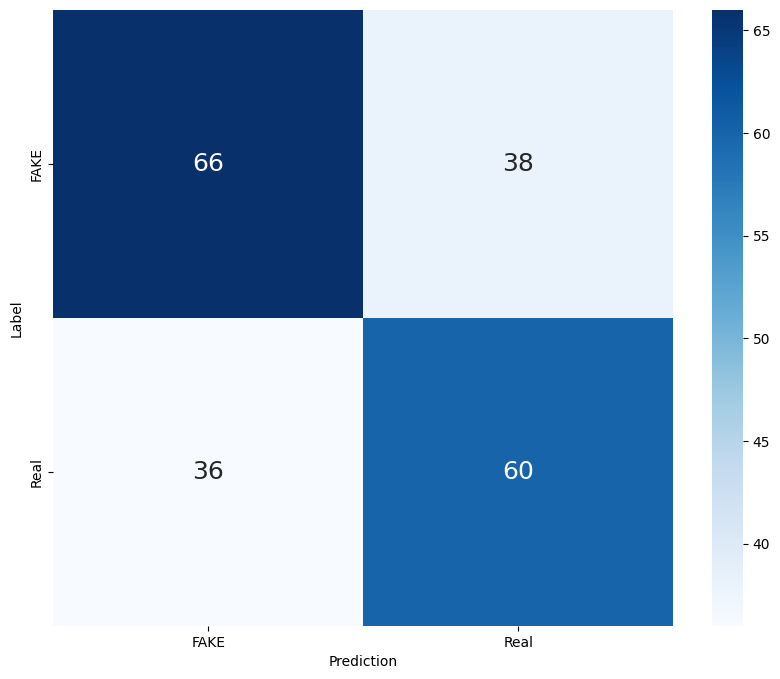

In [ ]:
# Vẽ biểu đồ heatmap ma trận nhầm lẫn
plt.figure(figsize=(10, 8))
label_names = np.unique(["Real", "FAKE"])
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues', xticklabels=label_names, yticklabels=label_names ,annot_kws={"size": 18})  # 'd' để hiển thị số nguyên
plt.xlabel('Prediction')
plt.ylabel('Label')
# plt.title('Confusion Matrix')
plt.show()

## Đánh giá hiệu xuất
- Độ chính xác (Accuracy):
- Độ chính xác của lớp 0:
- Độ chính xác của lớp 1:
- Độ bao phủ của lớp 0:
- Độ bao phủ của lớp 1:

## Biểu diễn trên ma trận nhầm lẫn cho thấy
- Có 137 mãu(label 0) và 108 mẫu (label 1) được phân loại đúng
- Có 14 mẫu(label 0) bị dự đoán sai thành mẫu(label 1)
- Có 41 mẫu(label 1) bị dự đoán sai thành mẫu(label 0)

### Biểu đồ Calibration

So sánh tỷ lệ dương tính thực tế với xác suất dự đoán trung bình trong mỗi bin. Một mô hình được hiệu chỉnh tốt sẽ có đường cong calibration gần với đường chéo.

7/7 ━━━━━━━━━━━━━━━━━━━━ 1s 139ms/step


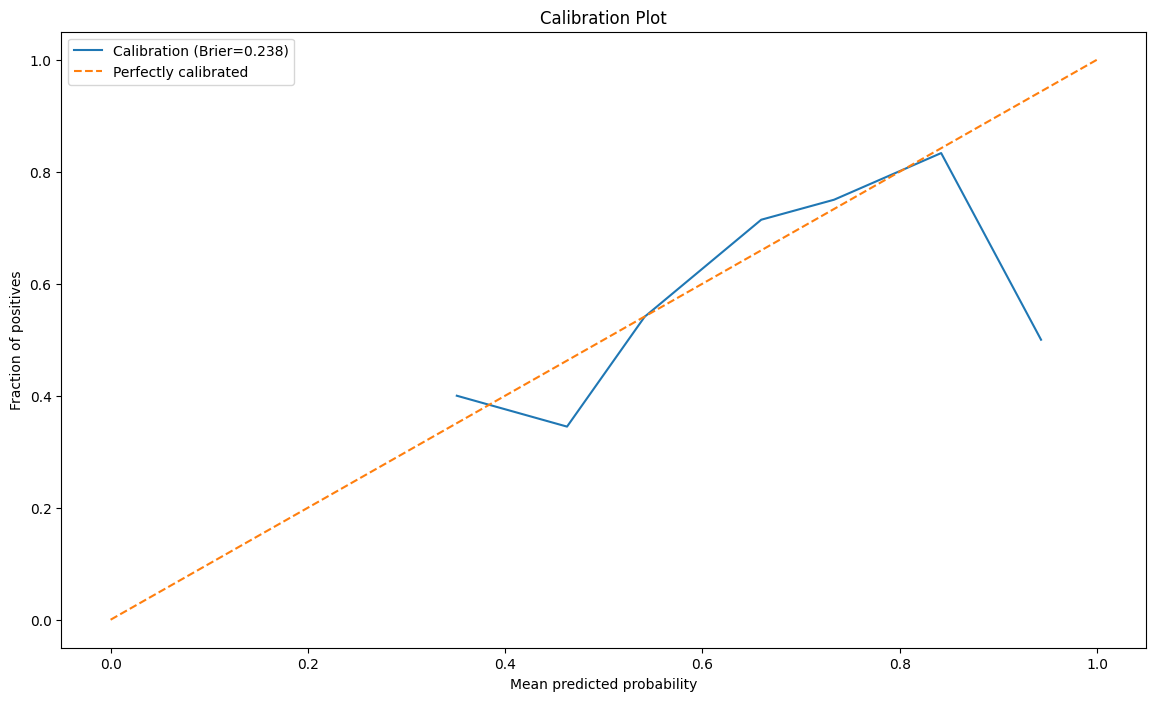

In [ ]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.calibration import calibration_curve
from sklearn.metrics import brier_score_loss
import tensorflow as tf

# Dự đoán xác suất trên tập kiểm tra
y_prob = model.predict(X_test)

# Lấy nhãn thực tế từ tập kiểm tra
y_true = y_test

# Tính toán độ tin cậy và tần suất thực tế
fraction_of_positives, mean_predicted_value = calibration_curve(y_true, y_prob, n_bins=10)

# Tính điểm Brier
brier_score = brier_score_loss(y_true, y_prob)

# Vẽ biểu đồ calibration
plt.figure(figsize=(14, 8))
plt.plot(mean_predicted_value, fraction_of_positives, label=f'Calibration (Brier={brier_score:.3f})')
plt.plot([0, 1], [0, 1], linestyle='--', label='Perfectly calibrated')
plt.xlabel('Mean predicted probability')
plt.ylabel('Fraction of positives')
plt.title('Calibration Plot')
plt.legend()
plt.show()

## Biểu diễn đồ thị loss function

# **Chuyển từ file đầu vào thành tensor**

In [ ]:
def preprocess_audio(file_path):
  audio, sr = librosa.load(file_path)
  mel_spectrogram = to_mel_spectrogram(audio, sr)
  mel_spectrogram = resize_mel_spectrogram(mel_spectrogram)
  mel_spectrogram = normalize_mel_spectrogram(mel_spectrogram)
  mel_spectrogram = reshape_mel_spectrogram(mel_spectrogram)
  return mel_spectrogram

#### Hàm dự đoán

In [ ]:
def get_label(prediction, threshold):
    if prediction[0][1] > threshold:
        return 1
    else:
        return 0

#### Lấy ra kết quả dự đoán

In [ ]:
def predict_audio(file_path, model, threshold=0.5):
    mel_spectrogram = preprocess_audio(file_path)
    prediction = model.predict(np.expand_dims(mel_spectrogram, axis=0))
    label = get_label(prediction, threshold)
    return prediction, label

In [ ]:
# Kiểm tra kích thước đầu vào của mô hình
model.summary()

Model: "sequential_2"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ conv1d_3 (Conv1D)                    │ (None, 31998, 16)           │              64 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ max_pooling1d_3 (MaxPooling1D)       │ (None, 15999, 16)           │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ flatten_2 (Flatten)                  │ (None, 255984)              │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dropout (Dropout)                    │ (None, 255984)              │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_4 (Dense)                      │ (None, 128)                 │      32,766,080 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_5 (Dense)                      │ (None, 1)                   │             129 │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 98,298,821 (374.98 MB)

 Trainable params: 32,766,273 (124.99 MB)

 Non-trainable params: 0 (0.00 B)

 Optimizer params: 65,532,548 (249.99 MB)

In [ ]:
# # Tiền xử lý
# prediction, label = predict_audio(real_file_test, model)
# # label = get_label(prediction)

# # Kết quả
# print(f"File âm thanh được dự đoán là: {label}")
# print(f"Xác xuất: {prediction}")

# **Kết nối test với chuỗi file khác đã chuẩn bị**

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [ ]:
FOLDER_PATH = '/content/drive/MyDrive/GGCOLAB/AUDIO/DEMONSTRATION'

In [ ]:
FILE_TESTS = []
for file in os.listdir(FOLDER_PATH):
  FILE_TESTS.append(os.path.join(FOLDER_PATH, file))

for file in FILE_TESTS:
  print(file)

/content/drive/MyDrive/GGCOLAB/AUDIO/DEMONSTRATION/linus-to-musk-DEMO.wav
/content/drive/MyDrive/GGCOLAB/AUDIO/DEMONSTRATION/linus-original-DEMO.wav
/content/drive/MyDrive/GGCOLAB/AUDIO/DEMONSTRATION/nnhan01.m4a
/content/drive/MyDrive/GGCOLAB/AUDIO/DEMONSTRATION/real01.wav
/content/drive/MyDrive/GGCOLAB/AUDIO/DEMONSTRATION/fake01.wav


### Dữ liệu test được chuẩn bị
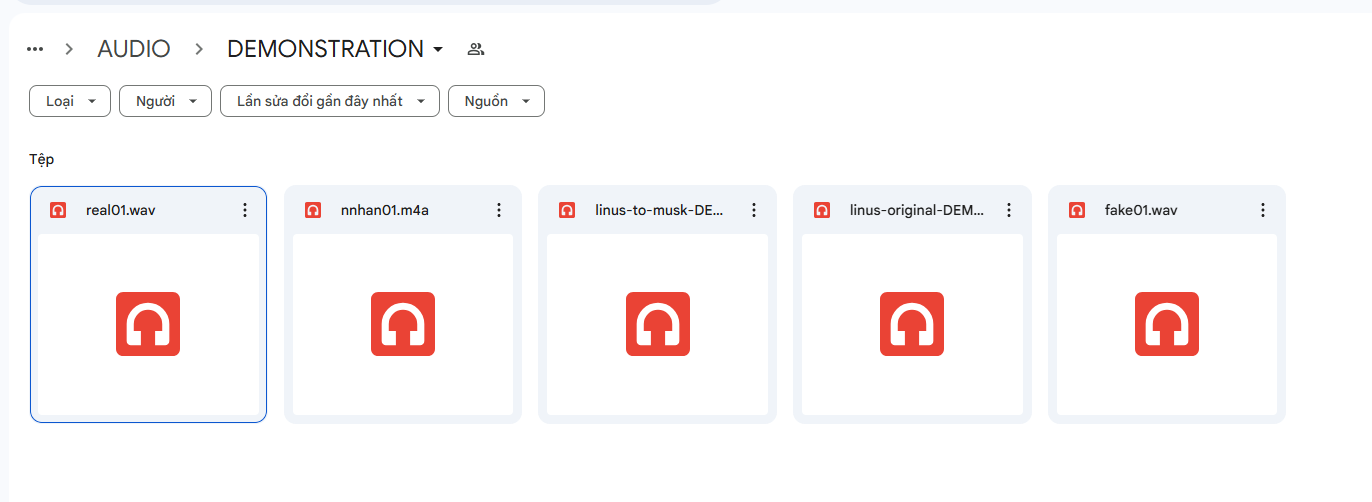

In [ ]:
# # Test file
# for file in FILE_TESTS:
#   prediction, label = predict_audio(file, model)
#   # label = get_label(prediction)
#   print(f"File âm thanh được dự đoán là: {label}")
#   print(f"Xác xuất: {prediction}")

### CNN MODEL VỚI 2 LỚP CONV1D

In [ ]:
import numpy as np
import tensorflow as tf
from tensorflow import keras
from keras import models, layers
from sklearn.model_selection import train_test_split

from sklearn.metrics import roc_auc_score, matthews_corrcoef, f1_score
import time


# features là mảng numpy có kích thước (số lượng mẫu, độ dài tín hiệu)
# labels là mảng numpy có kích thước (số lượng mẫu,)

# Chia dữ liệu thành tập huấn luyện và tập kiểm tra
X_train, X_test, y_train, y_test = train_test_split(features, labels, test_size=0.2)

# Định hình lại dữ liệu đầu vào cho 1D CNN
X_train = np.expand_dims(X_train, axis=2)
X_test = np.expand_dims(X_test, axis=2)

# Xây dựng mô hình 1D CNN
model = tf.keras.Sequential([
    keras.layers.Conv1D(16, 3, activation='relu', input_shape=(X_train.shape[1], 1)),
    keras.layers.MaxPooling1D(2),

    keras.layers.Conv1D(32, 3, activation='relu'),
    keras.layers.MaxPooling1D(2),

    keras.layers.Flatten(),
    keras.layers.Dropout(0.2),
    keras.layers.Dense(128, activation='relu'),
    keras.layers.Dense(1, activation='sigmoid')
])

# Biên dịch mô hình
model.compile(optimizer='adam', loss='binary_crossentropy', metrics=['accuracy'])

early_stopping = keras.callbacks.EarlyStopping(monitor='val_loss', patience=10, restore_best_weights=True)

aucs = []
mccs = []
f1s = []

# Thời gian bắt đầu
start_time = time.time()
# Huấn luyện mô hình
history = model.fit(X_train, y_train, epochs=10, validation_data=(X_test, y_test), callbacks=[early_stopping])
# Thời gian kết thúc
end_time = time.time()

/usr/local/lib/python3.11/dist-packages/keras/src/layers/convolutional/base_conv.py:107: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


Epoch 1/10
25/25 ━━━━━━━━━━━━━━━━━━━━ 41s 2s/step - accuracy: 0.5103 - loss: 0.8406 - val_accuracy: 0.4700 - val_loss: 0.6967
Epoch 2/10
25/25 ━━━━━━━━━━━━━━━━━━━━ 42s 2s/step - accuracy: 0.4942 - loss: 0.6524 - val_accuracy: 0.5050 - val_loss: 0.6950
Epoch 3/10
25/25 ━━━━━━━━━━━━━━━━━━━━ 40s 2s/step - accuracy: 0.6311 - loss: 0.6020 - val_accuracy: 0.6000 - val_loss: 0.6935
Epoch 4/10
25/25 ━━━━━━━━━━━━━━━━━━━━ 40s 2s/step - accuracy: 0.8587 - loss: 0.4470 - val_accuracy: 0.6750 - val_loss: 0.8317
Epoch 5/10
25/25 ━━━━━━━━━━━━━━━━━━━━ 41s 2s/step - accuracy: 0.9475 - loss: 0.2011 - val_accuracy: 0.6450 - val_loss: 0.9944
Epoch 6/10
25/25 ━━━━━━━━━━━━━━━━━━━━ 39s 2s/step - accuracy: 0.9842 - loss: 0.0872 - val_accuracy: 0.6550 - val_loss: 1.4084
Epoch 7/10
25/25 ━━━━━━━━━━━━━━━━━━━━ 39s 2s/step - accuracy: 0.9926 - loss: 0.0403 - val_accuracy: 0.6400 - val_loss: 1.4424
Epoch 8/10
25/25 ━━━━━━━━━━━━━━━━━━━━ 39s 2s/step - accuracy: 0.9978 - loss: 0.0183 - val_accuracy: 0.6350 - val_loss:

In [ ]:
training_time = end_time - start_time

# Dự đoán trên tập kiểm tra
y_pred_proba = model.predict(X_test)
y_pred = (y_pred_proba > 0.5).astype(int)

# Tính các độ đo
auc = roc_auc_score(y_test, y_pred_proba)
mcc = matthews_corrcoef(y_test, y_pred)
f1 = f1_score(y_test, y_pred)
acc = model.evaluate(X_test, y_test)[1]

# In kết quả

print(f"Accuracy: {acc:.4f}")
print(f"AUC: {auc:.4f}")
print(f"MCC: {mcc:.4f}")
print(f"F1-score: {f1:.4f}")
print(f"Thời gian huấn luyện: {training_time:.2f} giây")

7/7 ━━━━━━━━━━━━━━━━━━━━ 2s 223ms/step
7/7 ━━━━━━━━━━━━━━━━━━━━ 2s 211ms/step - accuracy: 0.5933 - loss: 0.6965
Accuracy: 0.6000
AUC: 0.6436
MCC: 0.2262
F1-score: 0.6396
Thời gian huấn luyện: 402.56 giây


### BIỂU ĐỒ BIỂU DIỄN

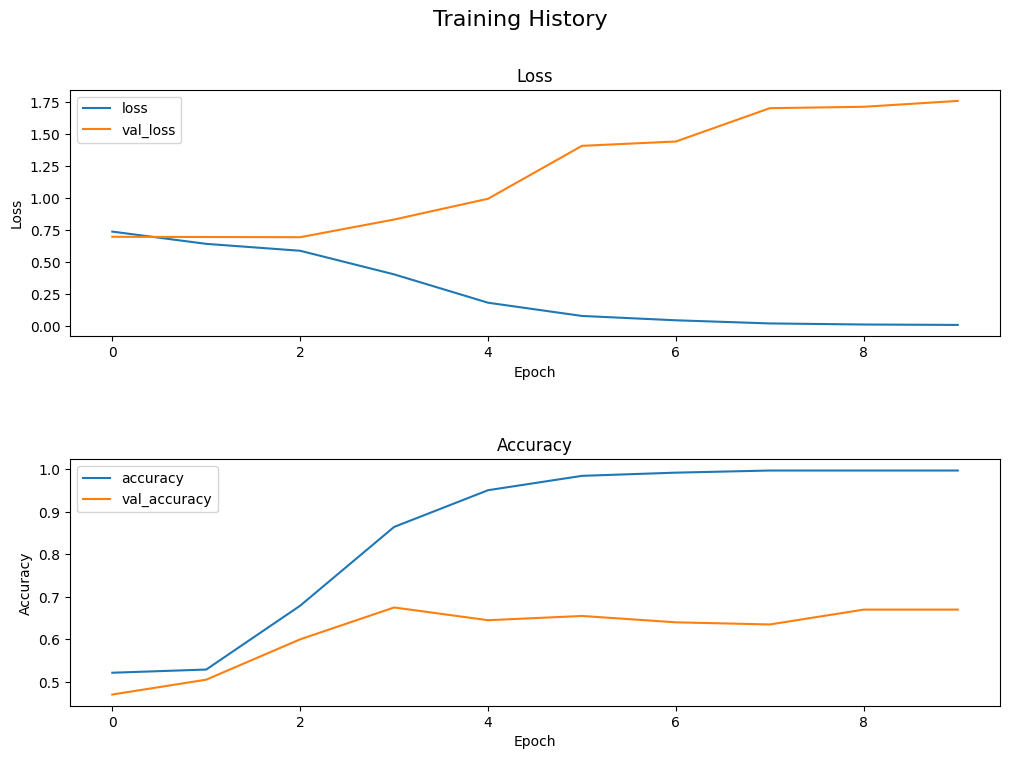

In [ ]:

fig, axs = plt.subplots(2, 1, figsize=(12, 8))

fig.suptitle('Training History', fontsize=16)

axs[0].plot(history.epoch, history.history['loss'], history.history['val_loss'])
axs[0].set(title='Loss', xlabel='Epoch', ylabel='Loss')
axs[0].legend(['loss', 'val_loss'])

axs[1].plot(history.epoch, history.history['accuracy'], history.history['val_accuracy'])
axs[1].set(title='Accuracy', xlabel='Epoch', ylabel='Accuracy')
axs[1].legend(['accuracy', 'val_accuracy'])

plt.subplots_adjust(hspace=0.5)

plt.show()

In [ ]:
# Tính toán ma trận nhầm lẫn
cm = confusion_matrix(y_true, y_pred_classes)

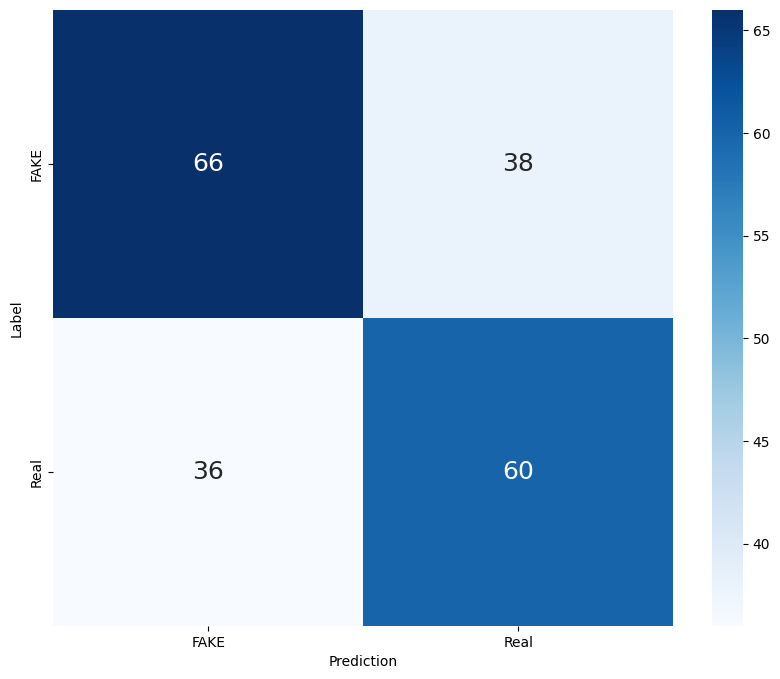

In [ ]:
# Vẽ biểu đồ heatmap ma trận nhầm lẫn
plt.figure(figsize=(10, 8))
label_names = np.unique(["Real", "FAKE"])
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues', xticklabels=label_names, yticklabels=label_names ,annot_kws={"size": 18})  # 'd' để hiển thị số nguyên
plt.xlabel('Prediction')
plt.ylabel('Label')
# plt.title('Confusion Matrix')
plt.show()